## Introduction

At many points in your career, you'll need to be able to build complete, end-to-end data science projects on your own. Data science projects usually consist of one of two things:

- An exploration and analysis of a set of data. One example might involve analyzing donors to political campaigns, creating a plot, and then sharing an analysis of the plot with others.- 
An operational system that generates predictions based on data that updates continually. An algorithm that pulls in daily stock ticker data and predicts which stock prices rise and fall would be one example.

You'll find the ability to create data science projects useful in several different contexts:



- Projects help you build a portfolio, which is critical to finding a job as a data analyst or scientist.
- Working on projects helps you learn new skills and reinforce existing concepts.
- Most "real-world" data science and analysis work consists of developing internal projects.
  
- Projects allow you to investigate interesting phenomena and satisfy your curiosity.

Whether you aim to become a data scientist or analyst or you're just curious about the world, building projects can be immensely rewarding.

In this lesson, we'll walk through the first part of a complete data science project, including how to acquire the raw data. The project focuses on exploring and analyzing a dataset. We'll develop our data cleaning and storytelling skills, which enables us to build complete projects on our own.

We'll focus primarily on data exploration in this lesson. We'll also combine several messy data sets into a single clean one to make analysis easier. Over the next few lessons, we'll work through the rest of our project and perform the actual analysis.

The first step in creating a project is to decide on a topic. You want the topic to be something you're interested in and motivated to explore. It's very obvious when people are making projects just to make them, rather than out of a genuine interest in the topic.

Here are two ways to find a good topic:

- Think about what sectors or angles you're really interested in, then find data sets relating to those sectors.
- Review several datasets and find one that seems interesting enough to explore.

Whichever approach you take, you can start your search at these sites:

- [Data.gov](https://www.data.gov/) - A directory of government data downloads
- [/r/datasets](https://reddit.com/r/datasets) - A subreddit that has hundreds of interesting datasets
- [Awesome datasets](https://github.com/caesar0301/awesome-public-datasets) - A list of datasets hosted on GitHub
- [rs.io](http://rs.io/100-interesting-data-sets-for-statistics/) - A great blog post with hundreds of interesting datasets

In real-world data science, you may not find an ideal dataset. You might have to aggregate disparate data sources instead or do a good amount of data cleaning.

or the purposes of this project, we'll be using data about New York City public schools, which can be found [here](https://data.cityofnewyork.us/browse?category=Education).

## Finding All of the Relevant Datasets

Once you've chosen a topic, you'll want to pick an angle to investigate. It's important to choose an angle that has enough depth to analyze but isn't so complicated that it's difficult to get started. You want to finish the project and your results to be interesting to others.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between [SAT scores](https://en.wikipedia.org/wiki/SAT) and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's important to perform well.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the dataset for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2). The first few rows of the SAT data look like this:

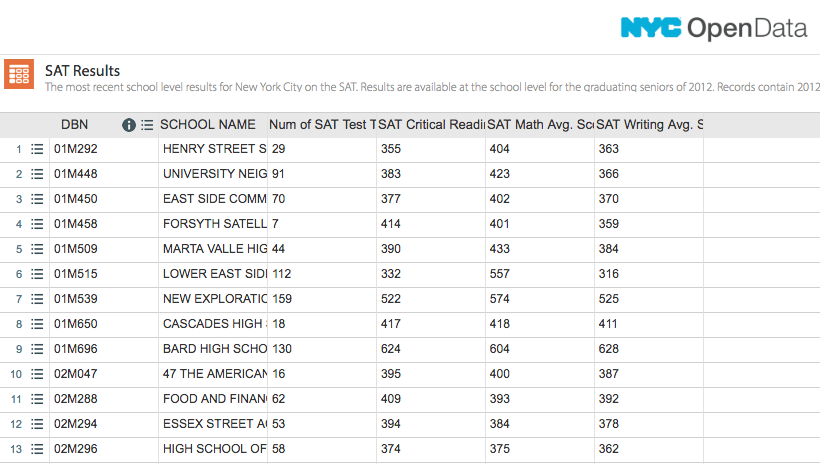

Unfortunately, combining both of the datasets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related datasets covering demographic information and test scores. Here are the links to all of the datasets we'll be using:

- [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
- [School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) - Attendance information for each school in New York City
- [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
- [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information
- [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school
- [School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

All of these datasets are interrelated. We'll need to combine them into a single dataset before we can find correlations.

## Finding Background Information

Before we move into coding, we'll need to do some background research. A thorough understanding of the data helps us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research gives us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

- [New York City](https://en.wikipedia.org/wiki/New_York_City)
- [The SAT](https://en.wikipedia.org/wiki/SAT)
- [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
- [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

- Only high school students take the SAT, so we'll want to focus on high schools.
- New York City is made up of five boroughs, which are essentially distinct regions.
- New York City schools fall within several different school districts, each of which can contain dozens of schools.
- Our datasets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
- Each school in New York City has a unique code called a DBN or district borough number.
- Aggregating data by district allows us to use the district mapping data to plot district-by-district differences.

## Reading in the Data

Once we've done our background research, we're ready to read in the data. For your convenience, we've placed all the data into the schools folder. Here are all of the files in the folder:

- ap_2010.csv - Data on [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e)
- class_size.csv - Data on [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
- demographics.csv - Data on [demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)
- graduation.csv - Data on [graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a)
- hs_directory.csv - A directory of [high schools](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2)
- sat_results.csv - Data on [SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)
- survey_all.txt - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from all schools
- survey_d75.txt - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from New York City [district 75](https://www.schools.nyc.gov/learning/special-education/school-settings/district-75)

survey_all.txt and survey_d75.txt are in more complicated formats than the other files. For now, we'll focus on reading in the CSV files only, and then explore them.

We'll read each file into a [pandas dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) and then store all of the dataframes in a dictionary. This gives us a convenient way to store them and a quick way to reference them later on.

In [1]:
import pandas as pd

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for file in data_files:
    data[file[:-4]] = pd.read_csv(f'../../Datasets/{file}')
    


## Exploring the SAT Data

What we're mainly interested in is the SAT dataset, which corresponds to the dictionary key sat_results. This dataset contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this dataset with information in the other datasets.

Let's explore sat_results to see what we can discover. Exploring the dataframe helps us understand the structure of the data and make it easier for us to analyze it.

In [2]:
df = data['sat_results'].head()
df

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


## Exploring the Remaining Data

When we printed the first five rows of the SAT data, the output looked like this:

We can make a few observations based on this output:

- The DBN appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.

Given these observations, let's explore the other datasets to see if we can gain any insight into how to combine them.

In [3]:
pd.melt(df, id_vars=['DBN','SCHOOL NAME'], value_vars=df.columns[2:])

,DBN,SCHOOL NAME,variable,value
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Num of SAT Test Takers,29
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Num of SAT Test Takers,91
2,01M450,EAST SIDE COMMUNITY SCHOOL,Num of SAT Test Takers,70
3,01M458,FORSYTH SATELLITE ACADEMY,Num of SAT Test Takers,7
4,01M509,MARTA VALLE HIGH SCHOOL,Num of SAT Test Takers,44
5,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,SAT Critical Reading Avg. Score,355
6,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,SAT Critical Reading Avg. Score,383
7,01M450,EAST SIDE COMMUNITY SCHOOL,SAT Critical Reading Avg. Score,377
8,01M458,FORSYTH SATELLITE ACADEMY,SAT Critical Reading Avg. Score,414
9,01M509,MARTA VALLE HIGH SCHOOL,SAT Critical Reading Avg. Score,390


In [4]:
for key in data:
    print(data[key].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

## Reading in the Survey Data

In the last step, we saw a group of dataframes that looked like this:

We can make some observations based on the first few rows of each one.

- Each dataset appears to either have a DBN column or the information we need to create one. That means we can use a DBN column to combine the datasets. First we'll pinpoint matching rows from different datasets by looking for identical DBNs, then group all of their columns together in a single dataset.
- Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
- Some of the datasets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each dataset. If we don't do this, we'll run into problems when we combine the datasets, because we might be merging two rows in one data set with one row in another dataset.

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (survey_all.txt and survey_d75.txt), but we didn't read those files in because they're in a slightly more complex format.

Each survey text file looks like this:

The files are tab delimited and encoded with Windows-1252 encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are UTF-8 and ASCII. Windows-1252 is rarely used and can cause errors if we read such a file in without specifying the encoding. If you'd like to read more about encodings, [here's](http://kunststube.net/encoding/) a good primer.[

We'll need to specify the encoding and delimiter to the pandas [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to ensure it reads the surveys in properly.

After we read in the survey data, we'll want to combine it into a single dataframe. We can do this by calling the [pandas.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function:

In [5]:
# z = pd.concat([x,y], axis=0)

The code above combines dataframes x and y by essentially appending y to the end of x. The combined dataframe z has the number of rows in x plus the number of rows in y.

## Now, let's read in the survey data.

In [6]:
all_survey = pd.read_csv('../../Datasets/survey_all.txt', delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('../../Datasets/survey_d75.txt', delimiter='\t', encoding='windows-1252')

survey = pd.concat([all_survey, d75_survey], axis=0)

In [7]:
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Up the Surveys

In the last step, the expected output was:

There are two immediate facts that we can see in the data:

- There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns makes it easier to print the dataframe out and find correlations within it.
- The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion makes the column name consistent with the other data sets.

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

Here's a preview of the data dictionary:

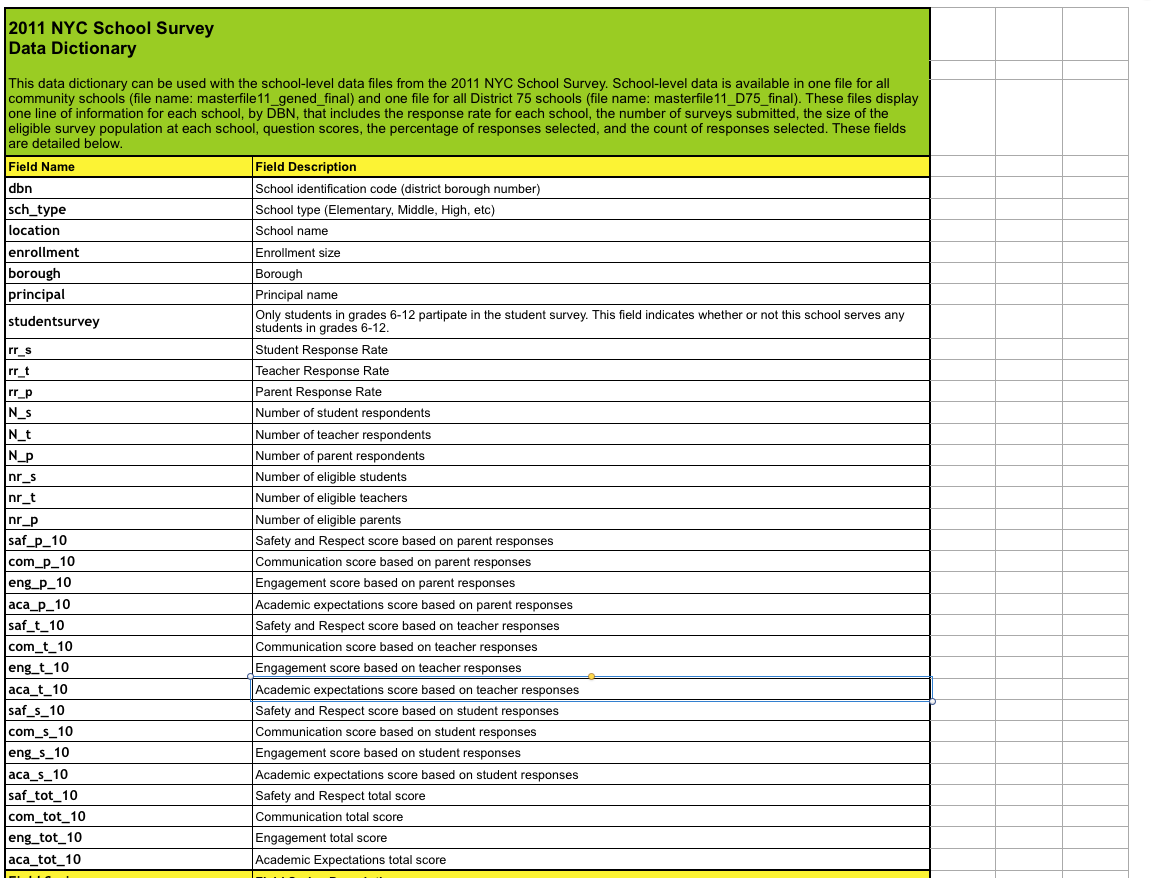

Based on the dictionary, it looks like these are the relevant columns:

In [8]:
cols = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

These columns give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It also gives us the DBN, which allows us to uniquely identify the school.

Before we filter columns out, we'll want to copy the data from the dbn column into a new column called DBN. We can copy columns like this:

In [9]:
# survey["new_column"] = survey["old_column"]

Additionally, it's important to use the [.copy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) method when working with pandas DataFrames. This ensures that we are working with a separate copy of the data, so any changes we make don't accidentally affect the original data.

In [10]:
survey = survey.copy()
survey['DBN'] = survey['dbn']


survey = survey[cols]
data['survey'] = survey

##  Inserting DBN Fields

When we explored all of the datasets, we noticed that some of them, like class_size and hs_directory, don't have a DBN column. hs_directory does have a dbn column, though, so we can just rename it.

However, class_size doesn't appear to have the column at all. Here are the first few rows of the data set:

In [11]:
df = data['class_size']
df.head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN


Here are the first few rows of the sat_results data, which does have a DBN column:

In [12]:
'1'.zfill(2)

'01'

In [13]:
df.CSD.astype(str).apply(lambda x: x.zfill(2)) + df['SCHOOL CODE']

0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
          ...  
27606    32K564
27607    32K564
27608    32K564
27609    32K564
27610    32K564
Length: 27611, dtype: object

In [14]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


From looking at these rows, we can tell that the DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data. The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long. Here's a diagram illustrating what we need to do:

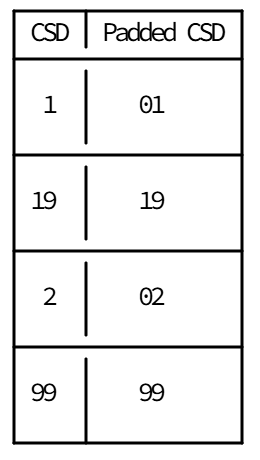

As you can see, whenever the CSD is less than two digits long, we need to add a leading 0. We can accomplish this using the [pandas.Series.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) method, along with a custom function that:

- Takes in a number.
- Converts the number to a string using the str() function.
- Check the length of the string using the len() function.

- If the string is two digits long, returns the string.
- If the string is one digit long, adds a 0 to the front of the string, then returns it.

You can use the string method [zfill()](https://docs.python.org/3/library/stdtypes.html#str.zfill) to do this.

Once we've padded the CSD, we can use the addition operator (+) to combine the values in the CSD and SCHOOL CODE columns. Here's an example of how we would do this:

In [15]:
# dataframe["new_column"] = dataframe["column_one"] + dataframe["column_two"]

And here's a diagram illustrating the basic concept:

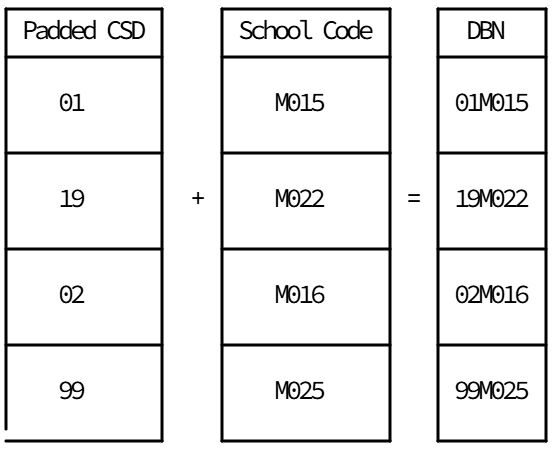

 ## Inserting DBN Fields

Now, let's insert the DBN fields.

In [16]:
data['hs_directory']['DBN'] = data['hs_directory']["dbn"]
data['class_size']['padded_csd'] = data['class_size']['CSD'].astype(str).apply(lambda x: x.zfill(2))
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

## Combining the SAT Scores

Now we're almost ready to combine our datasets. Before we do, let's take some time to calculate variables that are useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This makes it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results dataset from the object (string) data type to a numeric data type. We can use the [pandas.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) method for the conversion. If we don't convert the values, we won't be able to add the columns together.

It's important to pass the keyword argument errors="coerce" when we call pandas.to_numeric(), so that pandas treats any invalid strings it can't convert to numbers as missing values instead.

After we perform the conversion, we can use the addition operator (+) to add all three columns together.

In [17]:
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], errors='coerce')
data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], errors='coerce')
data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'], errors='coerce')

data['sat_results']['sat_score'] = data['sat_results'][data['sat_results'].columns[3:]].sum(axis=1)
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

## Parsing Geographic Coordinates for Schools

Next, we'll want to parse the latitude and longitude coordinates for each school. This enables us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field Location 1 in the hs_directory dataset.

Let's take a look at the first few rows:

As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field. Here's an example:

In [18]:
data['hs_directory']['Location 1'].iloc[6]

'850 Grand Street\nBrooklyn, NY 11211\n(40.71196311300048, -73.94043436699963)'

In [19]:

pattern = r'(\(.+\))'
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].str.extract(pattern, expand=False).replace('[()\n]', '', regex=True).str.split(',').str[-1]
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].str.extract(pattern, expand=False).replace('[()\n]', '', regex=True).str.split(',').str[0]

data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')

We're almost ready to combine our datasets! We've come a long way in this lesson -- we've gone from choosing a topic for a project to acquiring the data to having clean data that we're almost ready to combine.

Along the way, we've learned how to:

- Handle files with different formats and columns
- Prepare to merge multiple files
- Use text processing to extract coordinates from a string
- Convert columns from strings to numbers

You'll always learn something new while working on a real-world data science project. Each project is unique and there will always be quirks you don't quite know how to handle. The key is to be willing to try different approaches and to have a general framework in your head for how to move from Step A to Step B.

In the next lesson, we'll finish cleaning the datasets, then combine them so we can start our analysis.

In [20]:
# data

In a previous lesson, we began investigating possible relationships between SAT scores and demographic factors. In order to do this, we acquired several datasets about [New York City public schools](https://data.cityofnewyork.us/browse?category=Education). We manipulated these datasets and found that we could combine them using the DBN column. All of the datasets are currently stored as keys in the data dictionary. Each dataset is a pandas dataframe.

In this lesson, we'll clean the data more, then combine it. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the datasets. In the last lesson, we noticed that the values in the DBN column were unique in the sat_results data set. Other data sets like class_size had duplicate DBN values.

We'll need to condense these datasets so that each value in the DBN column is unique. If not, we'll run into issues when it comes time to combine the datasets.

While the main dataset we want to analyze, sat_results, has unique DBN values for every high school in New York City, other datasets aren't as clean. A single row in the sat_results dataset may match multiple rows in the class_size dataset, for example. This situation creates problems, because we don't know which of the multiple entries in the class_size dataset we should combine with the single matching entry in sat_results. Here's a diagram that illustrates the problem:

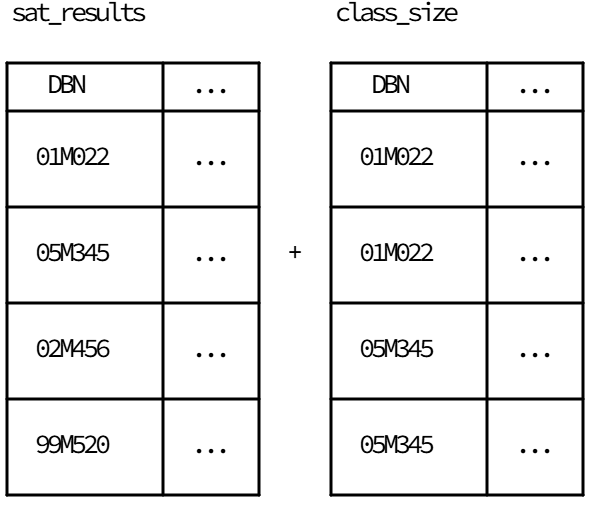

In the diagram above, we can't combine the rows from both datasets, because there are several cases where multiple rows in class_size match a single row in sat_results.

To resolve this issue, we'll condense the class_size, graduation and demographics datasets so that each DBN is unique.

## Condensing the Class Size Dataset

The first dataset that we'll condense is class_size. The first few rows of class_size look like this:

In [21]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


As you can see, the first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY).

If we look at the unique values for GRADE, we get the following:

In [22]:
data['class_size'].columns = [col.strip() for col in data['class_size'].columns]

In [23]:
data['class_size']['GRADE'].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

Since we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.

If we look at the unique values for PROGRAM TYPE, we get the following:

In [24]:
data['class_size']['PROGRAM TYPE'].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

Each school can have multiple program types. Since GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

##  Condensing the Class Size Dataset

Let's condense the class size dataset.

In [25]:
class_size = data['class_size']
class_size = class_size[(class_size['GRADE'] == '09-12') & (class_size['PROGRAM TYPE'] == 'GEN ED')]
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


## Computing Average Class Sizes

As we saw when we displayed class_size on the last screen, DBN still isn't completely unique. This is due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns.

CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) seem to pertain to different kinds of classes. For example, here are the unique values for CORE SUBJECT (MS CORE and 9-12 ONLY):

In [26]:
class_size['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

This column only seems to include certain subjects. We want our class size data to include every single class a school offers -- not just a subset of them. 

What we can do is take the average across all of the classes a school offers. This gives us unique DBN values, while also incorporating as much data as possible into the average.

Fortunately, we can use the [pandas.DataFrame.groupby()](http://pandas.pydata.org/pandas-docs/stable/groupby.html) method to help us with this. The DataFrame.groupby() method splits a dataframe up into unique groups, based on a given column. We can then use the [agg()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) method on the resulting pandas.core.groupby object to find the mean of each column.

Let's say we have this data set:

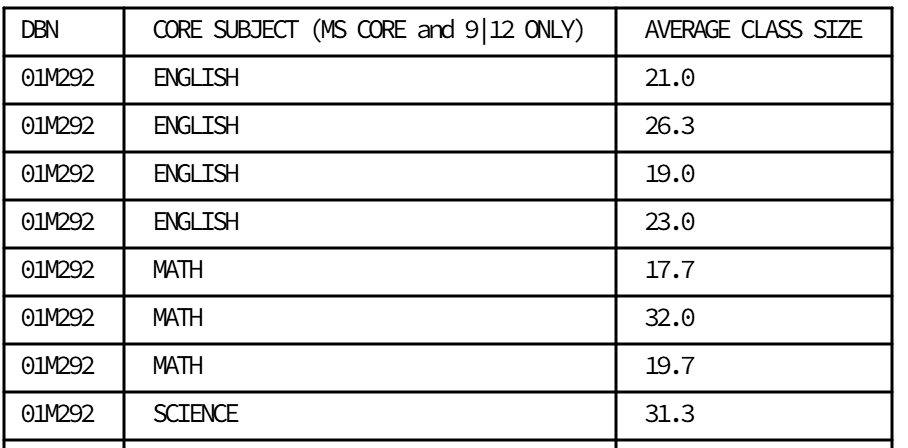

Using the groupby() method, we'll split this dataframe into four separate groups -- one with the DBN 01M292, one with the DBN 01M332, one with the DBN 01M378, and one with the DBN 01M448:

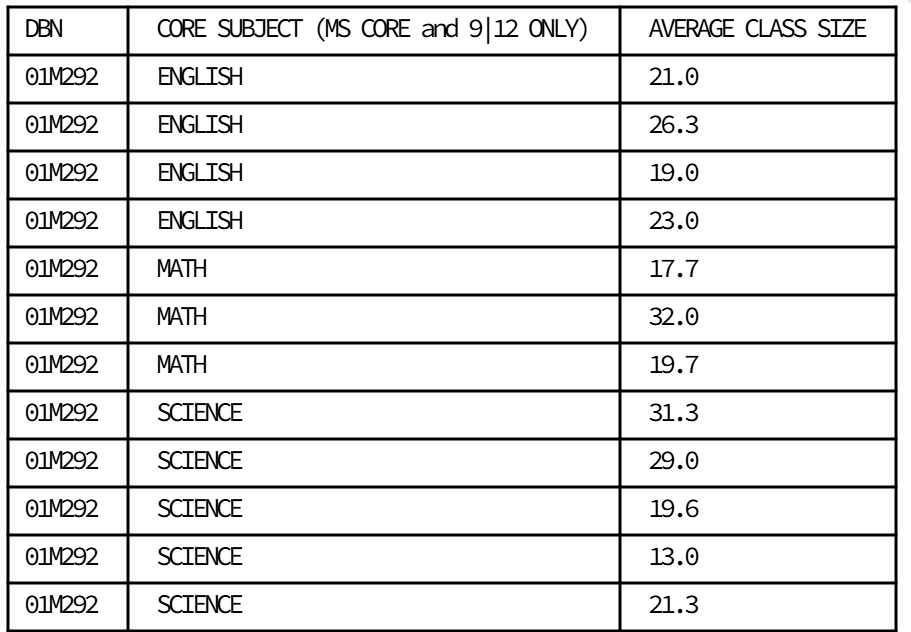

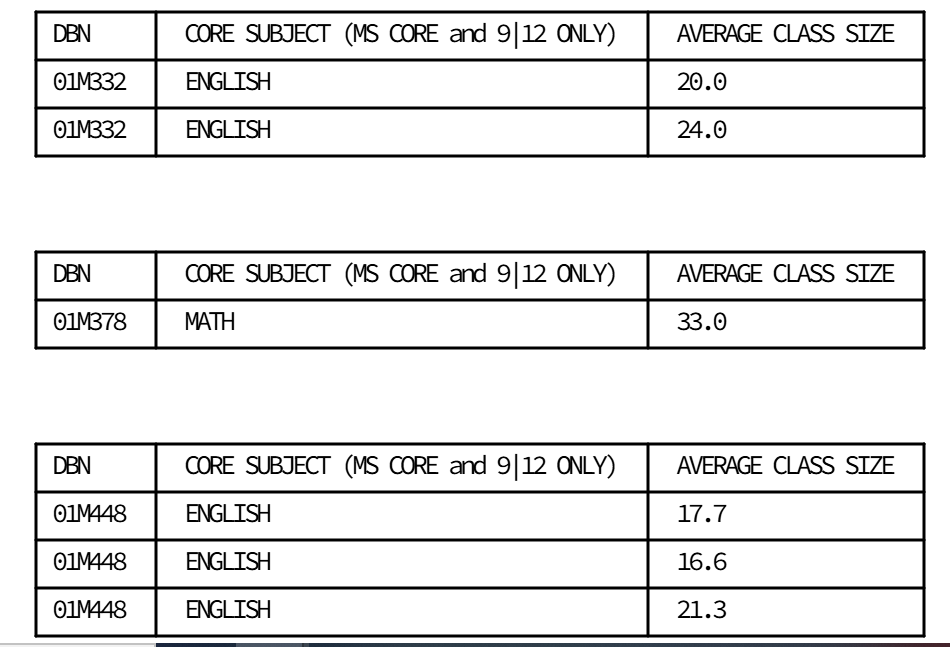

Then, we can compute the averages for the AVERAGE CLASS SIZE column in each of the four groups using the agg() method:

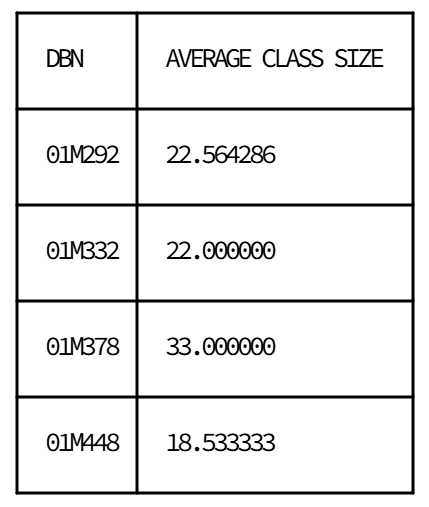

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case DBN) becomes the index and no longer appears as a column in the data itself. To undo this change and keep DBN as a column, we'll need to use [pandas.DataFrame.reset_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html). This method resets the index to a list of integers and make DBN a column again.

## Computing Average Class Sizes

Let's find the average class sizes.

In [27]:
import numpy as np

class_size = class_size.groupby('DBN').agg('mean', numeric_only=True).reset_index()
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1.0,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1.0,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1.0,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1.0,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1.0,57.6000,2.733333,21.200000,19.40,22.866667,NaN


## Condensing the Demographics Data Set

Now that we've finished condensing class_size, let's condense demographics. The first few rows look like this:

In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

Let's condense the demographics dataset.

In [28]:
demographics = data['demographics']
demographics = demographics[demographics['schoolyear'] == 20112012]
data['demographics'] = demographics
demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


## Condensing the Graduation Data Set

Finally, we'll need to condense the graduation dataset. Here are the first few rows:

The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

Let's condense the graduation dataset.

In [29]:
graduation = data['graduation']
graduation = graduation[(graduation['Cohort'] == '2006') & (graduation['Demographic'] == 'Total Cohort')]
data['graduation'] = graduation
graduation.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


## Converting AP Test Scores

We're almost ready to combine all of the datasets. The last thing to do is convert the [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are rarer in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the ap_2010 data set to numeric values first.

There are three columns we'll need to convert:

- AP Test Takers (note that there's a trailing space in the column name)
- Total Exams Taken
- Number of Exams with scores 3 4 or 5

In [30]:
ap_2010 = data['ap_2010']
ap_2010['AP Test Takers '] = pd.to_numeric(ap_2010['AP Test Takers '], errors='coerce')
ap_2010['Total Exams Taken'] = pd.to_numeric(ap_2010['Total Exams Taken'], errors='coerce')
ap_2010['Number of Exams with scores 3 4 or 5'] = pd.to_numeric(ap_2010['Number of Exams with scores 3 4 or 5'], errors='coerce')
data['ap_2010'] = ap_2010
ap_2010.dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

## Left, Right, Inner, and Outer Joins

Before we merge our data, we'll need to decide on the merge strategy we want to use. We'll be using the pandas [.DataFrame.merge() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), which supports four types of joins -- left, right, inner, and outer. Each of these join types dictates how pandas combines the rows.

We'll be using the DBN column to identify matching rows across datasets. In other words, the values in that column help us know which row from the first dataset to combine with which row in the second dataset.

There may be DBN values that exist in one dataset but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the DBN values in sat_results in all of the other datasets and other datasets may have DBN values that don't exist in sat_results.

We'll merge two datasets at a time. For example, we'll merge sat_results and hs_directory, then merge the result with ap_2010, then merge the result of that with class_size. We'll continue combining datasets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row has columns from all of the datasets.

The merge strategy we pick affects the number of rows we end up with. Let's take a look at each strategy.

Let's say we're merging the following two datasets:

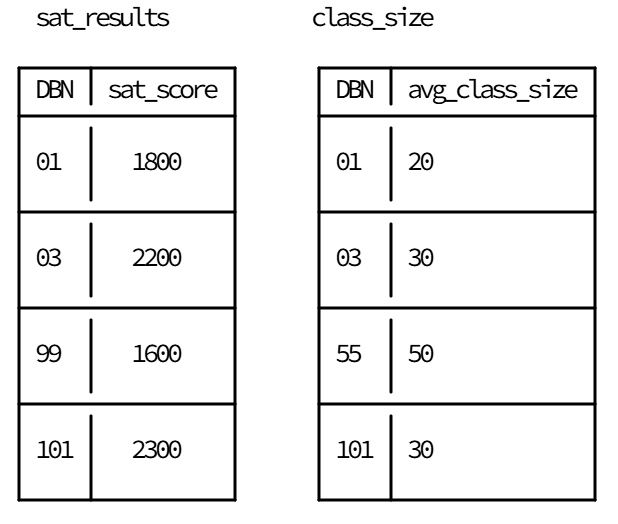

With an inner merge, we'd only combine rows where the same DBN exists in both datasets. We'd end up with this result:

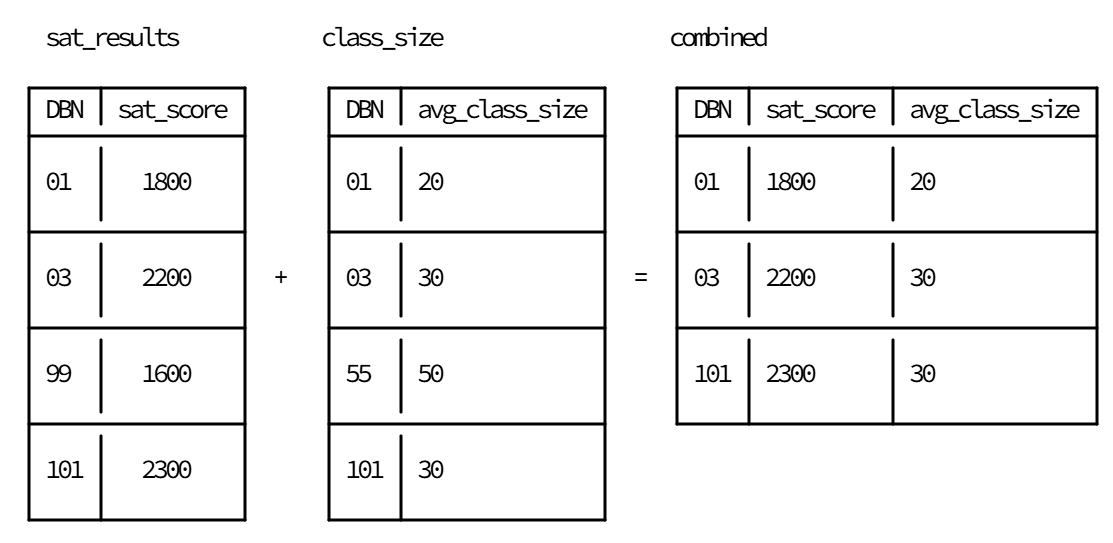

With a left merge, we'd only use DBN values from the dataframe on the "left" of the merge. In this case, sat_results is on the left. Some of the DBNs in sat_results don't exist in class_size, though. The merge handles this by assiging null values to the columns in sat_results that don't have corresponding data in class_size.

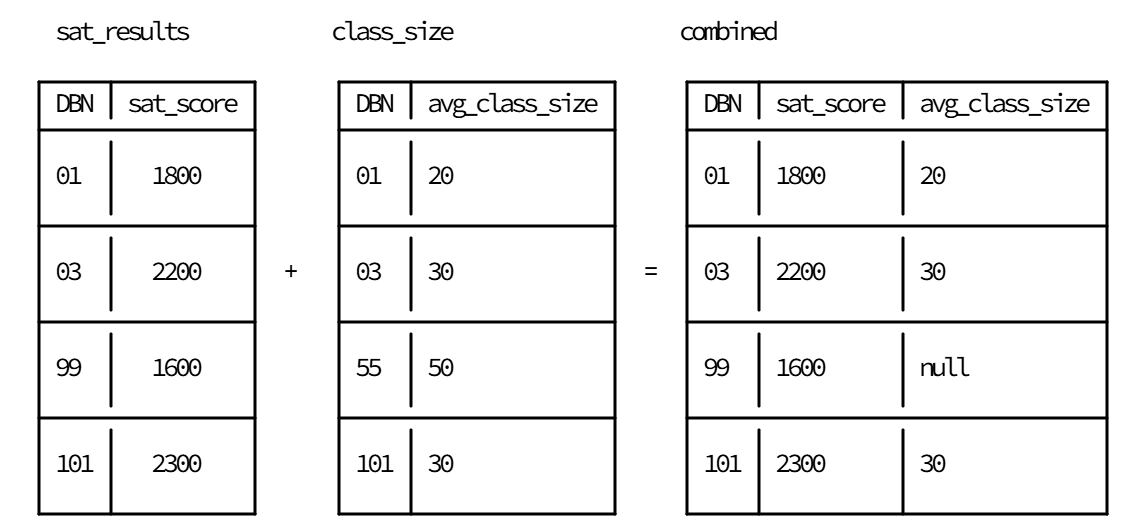

With a right merge, we'll only use DBN values from the dataframe on the "right" of the merge. In this case, class_size is on the right:

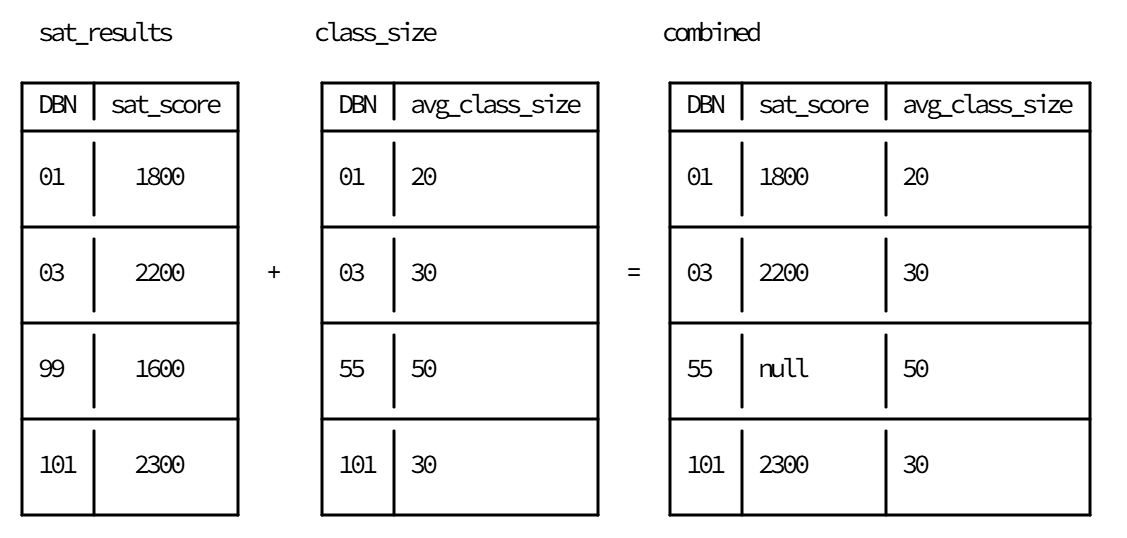

With an outer merge, we'll take any DBN values from either sat_results or class_size:

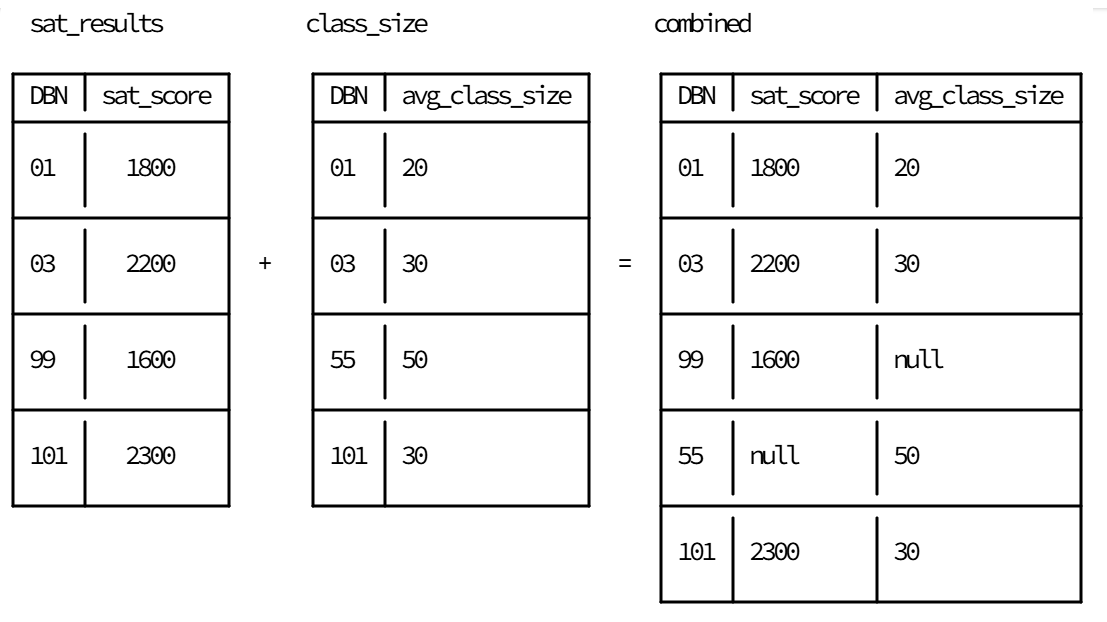

As you can see, each merge strategy has its advantages. Depending on the strategy we choose, we may preserve rows at the expense of having more missing column data or minimize missing data at the expense of having fewer rows. Choosing a merge strategy is an important decision; it's worth thinking about your data carefully and what trade-offs you're willing to make.

Since this project is concerned with determining demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values.

This means that we may need to use different merge strategies with different datasets. Some of the datasets have a lot of missing DBN values. This makes a left join more appropriate, because we don't want to lose too many rows when we merge. If we did an inner join, we would lose the data for many high schools.

Some datasets have DBN values that are almost identical to those in sat_results. Those datasets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from demographics, for example. Therefore, we'll do an inner join to avoid missing data in these columns.

## Performing the Left Joins

Both the ap_2010 and the graduation datasets have many missing DBN values, so we'll use a left join when we merge the sat_results data set with them. Since we're using a left join, our final dataframe will have all of the same DBN values as the original sat_results dataframe.

We'll need to use the pandas df.merge() method to merge dataframes. The "left" dataframe is the one we call the method on, and the "right" dataframe is the one we pass into df.merge().

Because we're using the DBN column to join the dataframes, we'll need to specify the keyword argument on="DBN" when calling pandas.DataFrame.merge().

First, we'll assign data["sat_results"] to the variable combined. Then, we'll merge the other dataframes with combined. When we're finished, combined has columns from all of the datasets.

In [31]:
combined = data['sat_results']
combined = combined.merge(ap_2010, how='left', on='DBN')
combined = combined.merge(graduation, how='left', on='DBN')
print(combined.shape)
combined.head()

(479, 33)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


## Performing the Inner Joins

Now that we've performed the left joins, we still have to merge class_size, demographics, survey, and hs_directory into combined. Since these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.

In [32]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]
# combined = data["class_size"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

# print(combined.head())
print(combined.shape)

(363, 159)


## Filling in Missing Values

You may have noticed that the inner joins resulted in 116 fewer rows in sat_results. This is because pandas couldn't find the DBN values that existed in sat_results in the other datasets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

You may also have noticed that we now have many columns with null (NaN) values. This is because we chose to do left joins, where some columns may not have had data. The dataset also had some missing values to begin with. If we hadn't performed a left join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data and we'll cover them in more detail later on. For now, we'll just fill in the missing values with the overall mean for the column, like so:

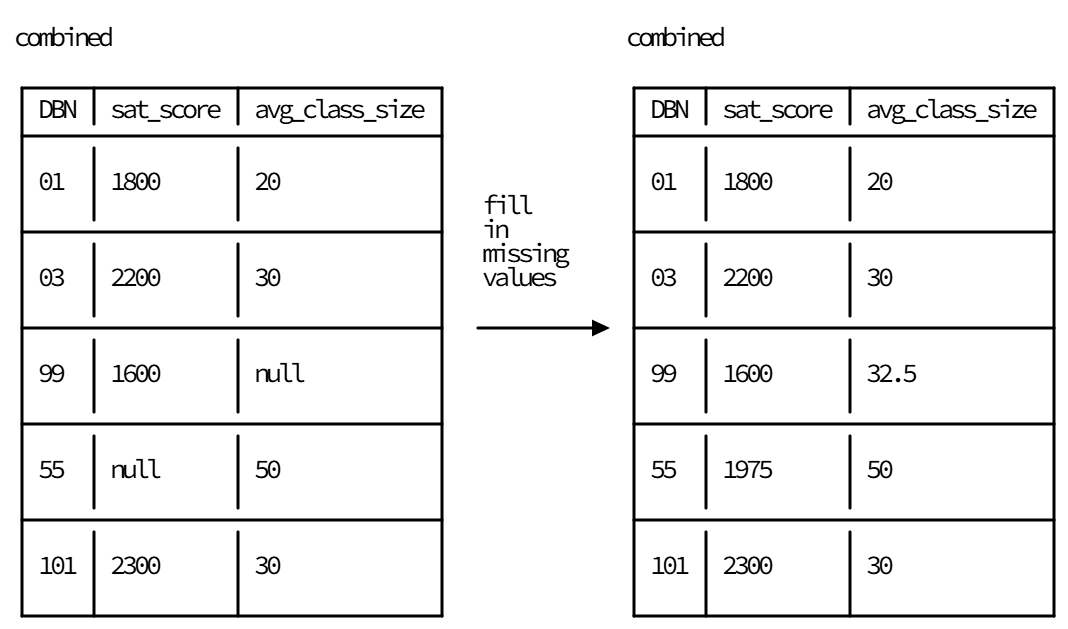

In the diagram above, the mean of the first column is (1800 + 1600 + 2200 + 2300) / 4, or 1975, and the mean of the second column is (20 + 30 + 30 + 50) / 4, or 32.5. We replace the missing values with the means of their respective columns, which allows us to proceed with analyses that can't handle missing values (like correlations).

We can fill in missing data in pandas using the [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) method. This method replaces any missing values in a dataframe with the values we specify. We can compute the mean of every column using the [pandas.DataFrame.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) method. If we pass the results of the df.mean() method into the df.fillna() method, pandas fills in the missing values in each column with the mean of that column.

Here's an example of how we would accomplish this:

In [33]:
# means = df.mean()
# df = df.fillna(means)

In this case, since the means are calculated on numeric columns, there’s no need to worry about the data types of non-numeric columns. However, when we fill remaining missing values with 0, we need to ensure that all columns, especially object-type columns, are treated properly. If there are columns with mixed or object types, filling missing values with 0 could lead to unexpected results or incorrect data types.

To address this, we use the [pandas.DataFrame.infer_objects()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.infer_objects.html) method. This method ensures that object-type columns in combined are converted to their appropriate inferred data types before filling the missing values with 0. We also use the copy=False parameter to avoid creating an unnecessary copy of the data.

After inferring the correct data types, we fill any remaining NaN or null values with 0:

In [34]:
# df = df.infer_objects(copy=False).fillna(0)

This step is important because infer_objects() ensures the data types are corrected before filling in values like 0, which could otherwise introduce type issues in object columns (e.g., trying to fill strings with 0). By doing this, we make sure all missing values are filled, and the data is ready for further analysis.

Let's fill in missing values.

In [35]:
combined = combined.fillna(combined.mean(numeric_only=True)).infer_objects(copy=False).fillna(0)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0.0,0.0,0.0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",-73.985260,40.713764
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0.0,0.0,0.0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",-73.984797,40.712332
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0.0,0.0,0.0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",-73.983041,40.729783
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0.0,0.0,0.0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",-73.985673,40.720569
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0.0,0.0,0.0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",-73.979426,40.718725


In [36]:
combined = combined.fillna(combined.mean(numeric_only=True))
combined = combined.infer_objects(copy=False).fillna(0)

# print(combined.head(5))

## Adding a School District Column for Mapping

We've finished cleaning and combining our data! We now have a clean dataset we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the dataset that specifies the school district helps us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

For example, we can use indexing to extract the first few characters of a string, like this:

In [37]:
combined['school_dist'] = combined['DBN'].str[:2]

We now have a clean dataset to analyze! We've done a lot in this lesson. We've gone from having several messy sources to one clean, combined, dataset that's ready for analysis.

Along the way, we've learned about:

- How to handle missing values
- Different types of merges
- How to condense datasets
- How to compute averages across dataframes

Data scientists rarely start out with tidy datasets, which makes cleaning and combining them one of the most critical skills any data professional can learn.

In the next lesson, we'll analyze our clean data to find correlations and create maps.

## Analyzing and Visualizing the Data

In other lessons, we began investigating possible relationships between SAT scores and demographics. In order to do this, we acquired several datasets containing information about [New York City public schools](https://data.cityofnewyork.us/browse?category=Education). We cleaned them, then combined them into a single dataset named combined that we're now ready to analyze and visualize.

In this lesson, we'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between columns and sat_score. This helps us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and create maps using the columns we've identified.

## Finding Correlations With the r Value

Correlations tell us how closely related two columns are. We'll be using the [r value](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), also called Pearson's correlation coefficient, to measure how closely two sequences of numbers are correlated.

An r value falls between -1 and 1. The value determines whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation. To learn more about r values, see the statistics course.

The columns in the following diagram have a strong positive correlation -- when the value in class_size is high, the corresponding value in sat_score is also high, and vice versa:

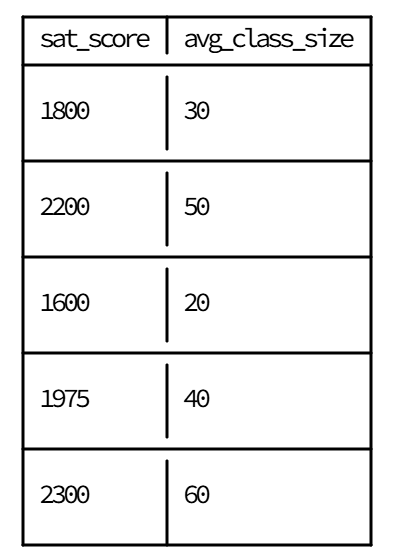


The r value for the columns in the diagram above is .99.

The columns in the following diagram have a strong negative correlation -- when the value in class_size is high, the corresponding value in sat_score is low, and when the value in sat_score is high, the value in class_size is low:

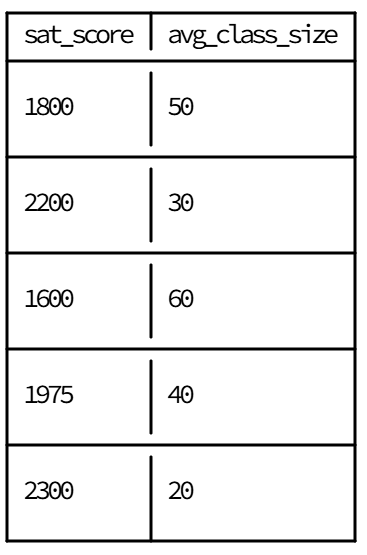

The r value for the columns in the diagram above is -.99.

In the next diagram, the columns aren't correlated -- class_size and sat_score don't have any strong pattern in their values:

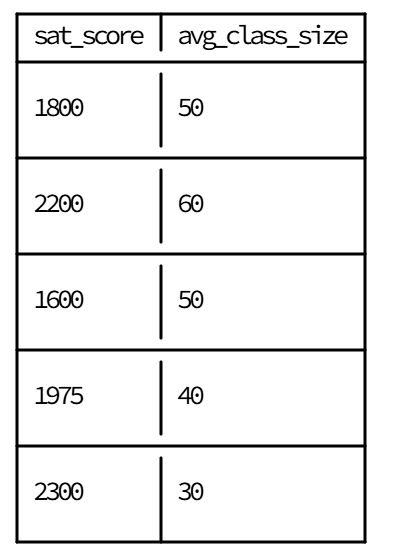

The r value for the columns in the diagram above is -.02, which is very close to 0.

In general, r values above .25 or below -.25 are enough to qualify a correlation as interesting. An r value isn't perfect and doesn't indicate that there's a correlation -- just the possiblity of one. To assess whether a correlation exists, we need to look at the data using a scatterplot to see its "shape." For example, here's a scatterplot with a very strong negative r value of -.73:

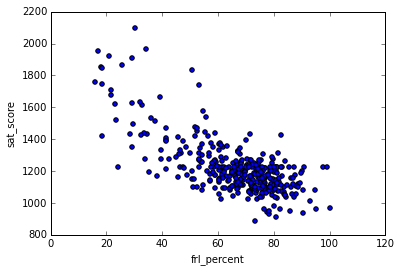

Notice how in the image above, all of the points appear to fall along a line. This pattern indicates a correlation.

Here's a scatterplot with an r value of .15, which indicates a weak correlation:

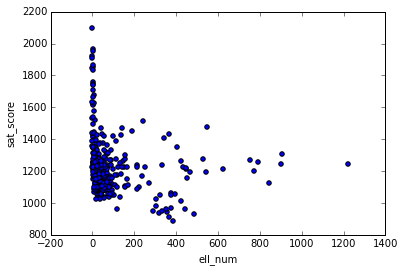

Notice how the data points in the image go in several directions, and there's no clear linear relationship. We'll explore correlations in greater detail later on in the statistics content. For now, this quick primer should be enough to get us through this project.

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women and vice-versa.

We can use the pandas [pandas.DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original dataset.

## Finding Correlations With the r Value

Let's use df.corr() to find all possible correlations in a dataframe.

In [38]:
for col in combined.columns:
    if 'score' in col.lower():
        print(col)

SAT Critical Reading Avg. Score
SAT Math Avg. Score
SAT Writing Avg. Score
sat_score
Number of Exams with scores 3 4 or 5


In [39]:
combined.corr(numeric_only=True)['sat_score']

SAT Critical Reading Avg. Score    0.472399
SAT Math Avg. Score                0.465612
SAT Writing Avg. Score             0.472854
sat_score                          1.000000
AP Test Takers                     0.254925
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.048274
lon                               -0.080811
Name: sat_score, Length: 67, dtype: float64

In [40]:
combined.shape

(363, 160)

## Read in the Data

In [41]:

import pandas as pd
import numpy
import re

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for f in data_files:
    key_name = f.replace(".csv", "")
    d = pd.read_csv(f"../../Datasets/{f}")
    data[key_name] = d

## Read in the Surveys

In [42]:
all_survey = pd.read_csv("../../Datasets/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("../../Datasets/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

survey = survey.copy()
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey[survey_fields]
data["survey"] = survey

## Add DBN Columns

In [43]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

## Convert Columns to Numeric

In [44]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

def find_lat(loc):
    coords = re.findall(r"\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall(r"\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

## Condense Datasets

In [45]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg('mean', numeric_only=True)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

## Convert AP Scores to Numeric

In [46]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

## Combine the Datasets

In [47]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined = combined.fillna(combined.mean(numeric_only=True))
combined = combined.infer_objects(copy=False).fillna(0)

## Add a School District Column for Mapping

In [48]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined = combined.copy()
combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

In [50]:
combined.corr(numeric_only=True)['sat_score']

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 67, dtype: float64

## Plotting Enrollment With the Plot() Accessor

This is the full output of the correlations variable we generated on the last screen:

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

- total_enrollment has a strong positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
  - Other columns that are proxies for enrollment correlate similarly. These include total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS.

- Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.

- Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.
- Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).
- There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
- The percentage of students eligible for free or reduced school lunch based on household income (frl_percent) has a strong negative correlation with SAT scores.

Since enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot represents a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the[pandas.DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) accessor on a dataframe. We can also specify a certain plot type. For example, df.plot.scatter(x="A", y="B") creates a scatterplot of columns A and B.

## Plotting Enrollment With the Plot() Accessor

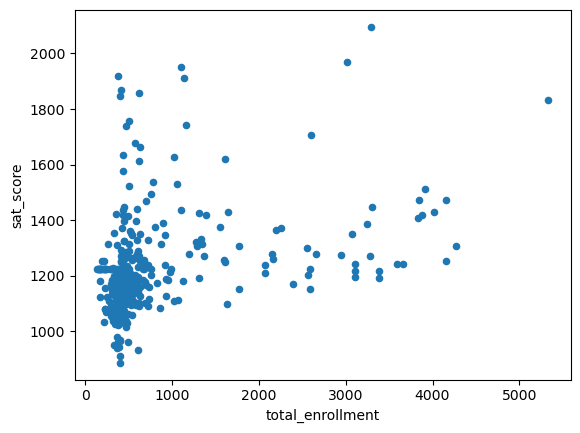

In [61]:
import matplotlib.pyplot as plt
import numpy as np
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

Let's explore the relationship between total_enrollment and sat_score further. We'll create a scatterplot to visualize the relationship between these two columns.

## Exploring Schools with Low SAT Scores and Enrollment

Judging from the plot we just created, it doesn't appear there's a strong correlation between sat_score and total_enrollment. If there was a strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [55]:
low_enrollment = combined[(combined['total_enrollment'] < 1000) & (combined['sat_score'] < 1000)]
low_enrollment['SchoolName']

91                                         0
125      Academy for Language and Technology
126                                        0
139    Kingsbridge International High School
141    International School for Liberal Arts
176                                        0
179                                        0
188                                        0
225                                        0
237                                        0
253                Multicultural High School
286                                        0
Name: SchoolName, dtype: object

## Plotting Language Learning Percentage

Our research on the last screen revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ell_percent that correlates strongly with sat_score, rather than total_enrollment. To explore this relationship further, let's plot out ell_percent vs sat_score.

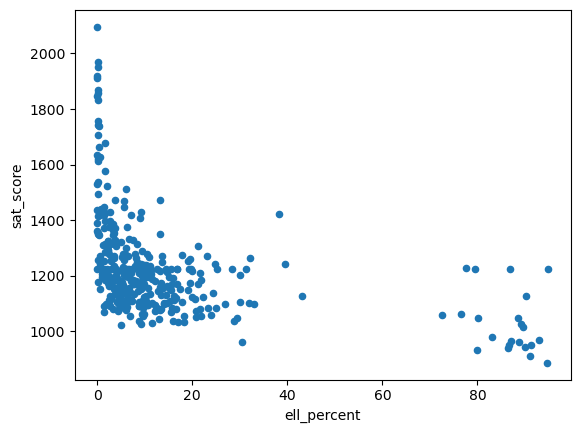

In [57]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

## Calculating District-Level Statistics

One way to make very granular statistics easier to read is to aggregate them. In this case, we aggregate by district, which enables us to understand how ell_percent varies district-by-district instead of the unintelligibly granular school-by-school variation.

In a previous lesson, we used the pandas.DataFrame.groupby() method followed by the agg() method on the resulting object to find the mean class size for each unique DBN. The principle is exactly the same, except that here we'd find the mean of each column for each unique value in school_dist.

In [64]:
districts = combined.groupby('school_dist').agg('mean', numeric_only=True).reset_index()
districts

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251
5,06,382.011940,400.565672,382.066269,1164.643881,108.711538,159.715385,105.425000,180.848387,6.0,...,12.0,12.0,10036.200000,628.900000,1.300000,0.0,0.0,0.0,40.848970,-73.932502
6,07,376.461538,380.461538,371.923077,1128.846154,73.703402,112.476331,105.276923,105.605459,7.0,...,12.0,12.0,10452.692308,465.846154,1.461538,0.0,0.0,0.0,40.816815,-73.919971
7,08,386.214383,395.542741,377.908005,1159.665129,118.379371,168.020979,144.731818,215.510264,8.0,...,12.0,12.0,10467.000000,547.636364,1.272727,0.0,0.0,0.0,40.823803,-73.866087
8,09,373.755970,383.582836,374.633134,1131.971940,71.411538,104.265385,98.470000,113.330645,9.0,...,12.0,12.0,10456.100000,449.700000,1.150000,0.0,0.0,0.0,40.836349,-73.906240
9,10,403.363636,418.000000,400.863636,1222.227273,132.231206,226.914336,191.618182,161.318182,10.0,...,12.0,12.0,10463.181818,757.863636,1.500000,0.0,0.0,0.0,40.870345,-73.898360


In this lesson, we found correlations, created visualizations, and analyzed data district-by-district! Now we have all the tools we need to analyze the data in greater depth.

Along the way, we learned:

- How to find correlations, and what those correlations mean
- Why we should plot data out, rather than relying on the r value alone
- That ell_percent has a strong negative correlation with sat_score

We now have the skills to analyze data sets and explain the quirks we find. These are essential skills for any data science professional.

Next, we'll use the skills and tools we've developed to analyze the New York City high school data more fully in a guided project.